# **Treinar e avaliar um modelo de clustering**

In [5]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
data = pd.read_csv('seeds.csv')

# Display a random sample of 10 observations (just the features)
features = data[data.columns[0:6]]
features.sample(10)

--2022-11-08 01:05:52--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: ‘seeds.csv.1’

seeds.csv.1         100%[===================>]   9.17K  --.-KB/s    in 0s      

2022-11-08 01:05:52 (73.8 MB/s) - ‘seeds.csv.1’ saved [9386/9386]



,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
157,12.13,13.73,0.8081,5.394,2.745,4.825
209,12.30,13.34,0.8684,5.243,2.974,5.637
205,12.19,13.20,0.8783,5.137,2.981,3.631
106,18.85,16.17,0.9056,6.152,3.806,2.843
136,17.36,15.76,0.8785,6.145,3.574,3.526
165,12.10,13.15,0.8793,5.105,2.941,2.201
204,12.37,13.47,0.8567,5.204,2.960,3.919
176,11.26,13.01,0.8355,5.186,2.710,5.335
177,10.74,12.73,0.8329,5.145,2.642,4.702
175,10.80,12.57,0.8590,4.981,2.821,4.773


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so they're on the same scale
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# Get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

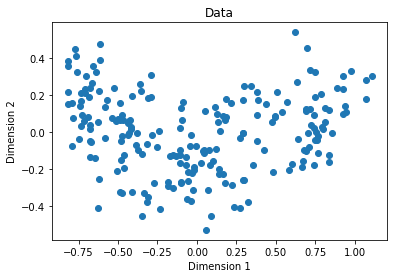

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:,0],features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

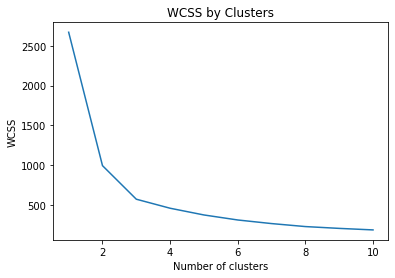

In [8]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(features.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)
    
#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()